In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from root_numpy import root2array, rec2array

branch_names = '''Xmomentum,Ymomentum,Momentum,Energy,MvdDEDX,MvdHits,SttMeanDEDX,SttHits,GemHits,
TofStopTime,TofM2,TofTrackLength,TofQuality,DrcThetaC,DrcQuality,
DiscThetaC,DiscQuality,EmcRawEnergy,EmcCalEnergy,EmcQuality,EmcNumberOfCrystals,
EmcNumberOfBumps,EmcModule,EmcZ20,EmcZ53,EmcLat,EmcE1,EmcE9,EmcE25,MuoQuality,MuoIron,
MuoMomentumIn,MuoNumberOfLayers,MuoModule,MuoHits,DegreesOfFreedom,ChiSquared'''.split(",")

branch_names_2 = '''momentumx,momentumy,momentum,energy,MvdDEDX,MvdHits,SttMeanDEDX,SttHits,GemHits,\
TofStopTime,TofM2,TofTrackLength,TofQuality,DrcThetaC,DrcQuality,\
DiscThetaC,DiscQuality,EmcRawEnergy,EmcCalEnergy,EmcQuality,EmcNumberOfCrystals,\
EmcNumberOfBumps,EmcModule,EmcZ20,EmcZ53,EmcLat,EmcE1,EmcE9,EmcE25,MuoQuality,MuoIron,\
MuoMomentumIn,MuoNumberOfLayers,MuoModule,MuoHits,DegreesOfFreedom,ChiSquared'''.split(",")

branch_names = [c.strip() for c in branch_names]
branch_names = list(branch_names)

def loadtrainingdata(name):
    filestring="/home/lewis/particles/box_500k_" + name + ".root"
    vals_1 = root2array(filestring, 't1', branch_names)
    vals_1 = rec2array(vals_1)
    filestring="/home/lewis/particles/box_500k_anti_" + name + ".root"
    vals_2 = root2array(filestring, 't1', branch_names)
    vals_2 = rec2array(vals_2)
    filestring="/home/lewis/particles/evt_500k_" + name + ".root"
    vals_3 = root2array(filestring, 't1', branch_names)
    vals_3 = rec2array(vals_3)
    filestring="/home/lewis/particles/dpmbkg_1M_" + name + ".root"
    vals_4 = root2array(filestring, 't1', branch_names)
    vals_4 = rec2array(vals_4)[:17644,:]
    vals = np.concatenate((vals_1,vals_2,vals_3,vals_4))
    print(vals.shape)
    return vals

def loadtestingdata(name):
    filestring="/home/lewis/150k_particles/150k/particles/" + name + "_150k_tree.root"
    vals_4 = root2array(filestring, 't1', branch_names_2)
    vals_4 = rec2array(vals_4)
    filestring="/home/lewis/150k_particles/150k/antiparticles/P" + name + "_theta_150k_tree.root"
    vals_5 = root2array(filestring, 't1', branch_names_2)
    vals_5 = rec2array(vals_5)
    vals = np.concatenate((vals_4,vals_5))
    print (vals.shape)
    return vals

#for particle in particle_list:
electrons = loadtrainingdata('electrons')
pions = loadtrainingdata('pions')
muons = loadtrainingdata('muons')
kaons = loadtrainingdata('kaons')
protons = loadtrainingdata('protons')

(1027754, 37)
(1308348, 37)
(1330956, 37)
(1240368, 37)
(1199514, 37)


In [52]:
def createdataframe(electrons,pions,muons,kaons,protons,branch_names):
    ###################################################################################
    X = np.concatenate((electrons, pions, muons, kaons, protons))
    y = np.concatenate(( np.zeros(electrons.shape[0]),np.ones(pions.shape[0]), (2*np.ones(muons.shape[0])), (3*np.ones(kaons.shape[0])), (4*np.ones(protons.shape[0])) ))
    df = pd.DataFrame(np.hstack((X, y.reshape(y.shape[0], -1))),columns=branch_names+['temp'])
    
    
    # added features
    df['Pt'] = np.sqrt( df.loc[:,'Xmomentum']**2  + df.loc[:,'Ymomentum']**2 )
    df['EoverP'] = df.loc[:,'EmcCalEnergy']/df.loc[:,'Momentum']

    df = df.drop(['Xmomentum'], axis=1)
    df = df.drop(['Ymomentum'], axis=1)

    df['labels'] = df.loc[:,'temp']
    df = df.drop(['temp'], axis=1)
    branch_names = list(df.columns.values[0:-1])
    pd.set_option('display.max_columns', None)
    return df

df = createdataframe(electrons,pions,muons,kaons,protons,branch_names)
mask = df['Momentum'] < 15
df = df[mask]
df.tail(10)

,Momentum,Energy,MvdDEDX,MvdHits,SttMeanDEDX,SttHits,GemHits,TofStopTime,TofM2,TofTrackLength,TofQuality,DrcThetaC,DrcQuality,DiscThetaC,DiscQuality,EmcRawEnergy,EmcCalEnergy,EmcQuality,EmcNumberOfCrystals,EmcNumberOfBumps,EmcModule,EmcZ20,EmcZ53,EmcLat,EmcE1,EmcE9,EmcE25,MuoQuality,MuoIron,MuoMomentumIn,MuoNumberOfLayers,MuoModule,MuoHits,DegreesOfFreedom,ChiSquared,Pt,EoverP,labels
6106930,0.435478,0.457298,0.014036,4.0,24.521255,27.0,0.0,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,-1.0,0.000000,0.000000,-1.000000,0.0,0.0,-1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.0,0.0,0.0,0.0,0.0,0.0,30.0,26.730413,0.265196,0.000000,4.0
6106931,1.008079,1.017695,0.004768,5.0,8.697116,25.0,0.0,4.620466,1.157659,93.483528,4.093003,0.346663,0.000150,0.0,-1.0,0.079483,0.078148,411.770935,1.0,1.0,1.0,1.000000,4.163752e-47,0.000000,0.079483,0.079483,0.079483,-1.0,0.0,0.0,0.0,0.0,0.0,30.0,28.751274,0.541839,0.077522,4.0
6106932,0.893629,0.904463,0.007179,4.0,9.235688,26.0,0.0,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,-1.0,0.314561,0.316406,0.138772,3.0,1.0,1.0,0.982816,2.002318e-03,0.030152,0.206053,0.314561,0.314561,-1.0,0.0,0.0,0.0,0.0,0.0,29.0,28.840164,0.571769,0.354069,4.0
6106933,1.109956,1.118697,0.005103,2.0,7.556309,26.0,0.0,2.827099,0.791069,65.902168,7.294002,0.444945,0.000061,0.0,-1.0,0.329529,0.325463,0.963064,4.0,1.0,1.0,0.989784,1.183070e-03,0.035557,0.235599,0.329529,0.329529,-1.0,0.0,0.0,0.0,0.0,0.0,24.0,17.248182,0.867581,0.293221,4.0
6106934,1.017017,1.026550,0.004670,5.0,7.912078,28.0,0.0,3.710106,0.961913,79.895607,22.177483,0.418193,0.000074,0.0,-1.0,0.094974,0.092850,87.093842,1.0,1.0,1.0,1.000000,4.028963e-46,0.000000,0.094974,0.094974,0.094974,-1.0,0.0,0.0,0.0,0.0,0.0,30.0,1516.125244,0.625436,0.091296,4.0
6106935,1.150455,1.158890,0.005519,6.0,8.056684,26.0,0.0,3.816624,0.836700,88.930679,0.655146,0.476603,0.000115,0.0,-1.0,0.322151,0.326993,0.110574,2.0,1.0,1.0,0.995634,9.687536e-04,0.000000,0.285381,0.322151,0.322151,-1.0,0.0,0.0,0.0,0.0,0.0,33.0,35.284492,0.669827,0.284230,4.0
6106936,1.013033,1.022603,0.005689,3.0,7.041866,22.0,0.0,2.910940,1.009322,61.262775,0.926874,0.375569,0.000072,0.0,-1.0,0.402527,0.397183,0.459049,2.0,1.0,1.0,0.993223,1.255021e-03,0.000000,0.328057,0.402527,0.402527,-1.0,0.0,0.0,0.0,0.0,0.0,23.0,34.550812,0.837975,0.392073,4.0
6106937,4.792536,4.794568,0.000000,0.0,31.032196,12.0,0.0,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,-1.0,0.000000,0.000000,-1.000000,0.0,0.0,-1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.0,0.0,0.0,0.0,0.0,0.0,7.0,248.200882,4.669758,0.000000,4.0
6106938,0.803603,0.815633,0.007153,3.0,12.755198,25.0,0.0,3.336746,1.234000,57.872181,0.160892,0.000000,-1.000000,0.0,-1.0,0.189461,0.187320,0.328168,1.0,1.0,1.0,1.000000,2.111341e-46,0.000000,0.189461,0.189461,0.189461,-1.0,0.0,0.0,0.0,0.0,0.0,26.0,34.533516,0.705016,0.233100,4.0
6106939,1.095710,1.104563,0.004811,4.0,8.352184,25.0,0.0,4.730715,0.805537,109.132401,1.189108,0.447728,0.000143,0.0,-1.0,0.427356,0.446916,2.603235,3.0,1.0,1.0,0.972573,9.822457e-04,0.263679,0.159463,0.305674,0.427356,-1.0,0.0,0.0,0.0,0.0,0.0,28.0,30.100483,0.515476,0.407878,4.0


In [53]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.decomposition import PCA

import keras
from keras import optimizers
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Reshape, BatchNormalization
from keras.optimizers import RMSprop, Adam, Adagrad
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical

X_train,X_test, y_train,y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.20, random_state=42)

# scale the features
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

NComponents = X_train.shape[1]
'''
# use pca
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=22, color='r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

NComponents = 22
pca = PCA(n_components=NComponents)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
'''

# some variables
batch_size = 4096
num_classes = 5
epochs = 2000

# one hot encoding
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)


# define model
model = Sequential()
model.add(BatchNormalization(input_shape=(NComponents,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

print(X_train.shape)
print(y_train.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 37)                148       
_________________________________________________________________
dense_8 (Dense)              (None, 512)               19456     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [4]:
import time

t0 = time.time()

history = model.fit(X_train , y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[EarlyStopping(verbose=True, patience=150, monitor='val_loss')],
                    validation_data=(X_test , y_test))

t = time.time() - t0

print("training time = ", t, " s")
print("********************************")

W0730 17:41:38.312103 140108818601664 deprecation.py:323] From /home/lewis/miniconda3/envs/pid/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4885552 samples, validate on 1221388 samples
Epoch 1/2000
4885552/4885552 [==============================] - 69s 14us/step - loss: 0.6770 - acc: 0.7288 - val_loss: 0.5282 - val_acc: 0.7910
Epoch 2/2000
4885552/4885552 [==============================] - 63s 13us/step - loss: 0.5525 - acc: 0.7854 - val_loss: 0.4823 - val_acc: 0.8077
Epoch 3/2000
4885552/4885552 [==============================] - 63s 13us/step - loss: 0.5069 - acc: 0.8032 - val_loss: 0.4483 - val_acc: 0.8213
Epoch 4/2000
4885552/4885552 [==============================] - 67s 14us/step - loss: 0.4827 - acc: 0.8126 - val_loss: 0.4363 - val_acc: 0.8254
Epoch 5/2000
4885552/4885552 [==============================] - 59s 12us/step - loss: 0.4722 - acc: 0.8162 - val_loss: 0.4211 - val_acc: 0.8308
Epoch 6/2000
4885552/4885552 [==============================] - 50s 10us/step - loss: 0.4610 - acc: 0.8203 - val_loss: 0.4076 - val_acc: 0.8379
Epoch 7/2000
4885552/4885552 [==============================] - 48s 10us/step - lo

4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3943 - acc: 0.8455 - val_loss: 0.3640 - val_acc: 0.8536
Epoch 58/2000
4885552/4885552 [==============================] - 50s 10us/step - loss: 0.3949 - acc: 0.8452 - val_loss: 0.3892 - val_acc: 0.8448
Epoch 59/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3952 - acc: 0.8452 - val_loss: 0.3666 - val_acc: 0.8521
Epoch 60/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3932 - acc: 0.8458 - val_loss: 0.3683 - val_acc: 0.8513
Epoch 61/2000
4885552/4885552 [==============================] - 51s 11us/step - loss: 0.3930 - acc: 0.8458 - val_loss: 0.3704 - val_acc: 0.8503
Epoch 62/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3926 - acc: 0.8462 - val_loss: 0.3717 - val_acc: 0.8508
Epoch 63/2000
4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3915 - acc: 0.8467 - val_loss: 0.4022 - val_acc: 0.8369

4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3843 - acc: 0.8494 - val_loss: 0.3835 - val_acc: 0.8441
Epoch 114/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3848 - acc: 0.8492 - val_loss: 0.3781 - val_acc: 0.8494
Epoch 115/2000
4885552/4885552 [==============================] - 51s 10us/step - loss: 0.3838 - acc: 0.8498 - val_loss: 0.3709 - val_acc: 0.8501
Epoch 116/2000
4885552/4885552 [==============================] - 50s 10us/step - loss: 0.3838 - acc: 0.8496 - val_loss: 0.3842 - val_acc: 0.8445
Epoch 117/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3841 - acc: 0.8495 - val_loss: 0.3838 - val_acc: 0.8469
Epoch 118/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3843 - acc: 0.8494 - val_loss: 0.3874 - val_acc: 0.8434
Epoch 119/2000
4885552/4885552 [==============================] - 46s 9us/step - loss: 0.3836 - acc: 0.8497 - val_loss: 0.3564 - val_acc: 0

4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3808 - acc: 0.8508 - val_loss: 0.3803 - val_acc: 0.8462
Epoch 170/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3807 - acc: 0.8508 - val_loss: 0.3660 - val_acc: 0.8523
Epoch 171/2000
4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3800 - acc: 0.8511 - val_loss: 0.3610 - val_acc: 0.8554
Epoch 172/2000
4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3793 - acc: 0.8515 - val_loss: 0.3696 - val_acc: 0.8512
Epoch 173/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3788 - acc: 0.8516 - val_loss: 0.3710 - val_acc: 0.8526
Epoch 174/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3804 - acc: 0.8512 - val_loss: 0.3578 - val_acc: 0.8564
Epoch 175/2000
4885552/4885552 [==============================] - 50s 10us/step - loss: 0.3795 - acc: 0.8513 - val_loss: 0.3766 - val_acc: 

4885552/4885552 [==============================] - 51s 10us/step - loss: 0.3778 - acc: 0.8519 - val_loss: 0.3865 - val_acc: 0.8430
Epoch 226/2000
4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3780 - acc: 0.8517 - val_loss: 0.3618 - val_acc: 0.8551
Epoch 227/2000
4885552/4885552 [==============================] - 53s 11us/step - loss: 0.3772 - acc: 0.8522 - val_loss: 0.3655 - val_acc: 0.8533
Epoch 228/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3771 - acc: 0.8523 - val_loss: 0.3626 - val_acc: 0.8543
Epoch 229/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3774 - acc: 0.8521 - val_loss: 0.3821 - val_acc: 0.8463
Epoch 230/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3784 - acc: 0.8517 - val_loss: 0.3638 - val_acc: 0.8547
Epoch 231/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3773 - acc: 0.8523 - val_loss: 0.3521 - val_acc: 

4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3740 - acc: 0.8537 - val_loss: 0.3570 - val_acc: 0.8570
Epoch 282/2000
4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3759 - acc: 0.8526 - val_loss: 0.3801 - val_acc: 0.8475
Epoch 283/2000
4885552/4885552 [==============================] - 46s 9us/step - loss: 0.3754 - acc: 0.8529 - val_loss: 0.3674 - val_acc: 0.8518
Epoch 284/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3751 - acc: 0.8531 - val_loss: 0.3714 - val_acc: 0.8498
Epoch 285/2000
4885552/4885552 [==============================] - 51s 10us/step - loss: 0.3744 - acc: 0.8532 - val_loss: 0.3688 - val_acc: 0.8528
Epoch 286/2000
4885552/4885552 [==============================] - 51s 10us/step - loss: 0.3749 - acc: 0.8531 - val_loss: 0.3525 - val_acc: 0.8584
Epoch 287/2000
4885552/4885552 [==============================] - 49s 10us/step - loss: 0.3758 - acc: 0.8528 - val_loss: 0.3597 - val_acc: 0

4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3738 - acc: 0.8535 - val_loss: 0.3663 - val_acc: 0.8520
Epoch 338/2000
4885552/4885552 [==============================] - 52s 11us/step - loss: 0.3733 - acc: 0.8537 - val_loss: 0.3549 - val_acc: 0.8578
Epoch 339/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3731 - acc: 0.8539 - val_loss: 0.3516 - val_acc: 0.8591
Epoch 340/2000
4885552/4885552 [==============================] - 50s 10us/step - loss: 0.3735 - acc: 0.8537 - val_loss: 0.3557 - val_acc: 0.8573
Epoch 341/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3729 - acc: 0.8540 - val_loss: 0.3675 - val_acc: 0.8518
Epoch 342/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3724 - acc: 0.8541 - val_loss: 0.3543 - val_acc: 0.8582
Epoch 343/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3721 - acc: 0.8543 - val_loss: 0.3788 - val_acc: 

4885552/4885552 [==============================] - 46s 9us/step - loss: 0.3715 - acc: 0.8545 - val_loss: 0.3656 - val_acc: 0.8538
Epoch 394/2000
4885552/4885552 [==============================] - 46s 9us/step - loss: 0.3731 - acc: 0.8538 - val_loss: 0.3690 - val_acc: 0.8520
Epoch 395/2000
4885552/4885552 [==============================] - 51s 10us/step - loss: 0.3714 - acc: 0.8545 - val_loss: 0.3678 - val_acc: 0.8516
Epoch 396/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3727 - acc: 0.8539 - val_loss: 0.3671 - val_acc: 0.8521
Epoch 397/2000
4885552/4885552 [==============================] - 45s 9us/step - loss: 0.3712 - acc: 0.8548 - val_loss: 0.3851 - val_acc: 0.8434
Epoch 398/2000
4885552/4885552 [==============================] - 50s 10us/step - loss: 0.3717 - acc: 0.8544 - val_loss: 0.3573 - val_acc: 0.8570
Epoch 399/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3722 - acc: 0.8541 - val_loss: 0.3650 - val_acc: 0.8

4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3709 - acc: 0.8548 - val_loss: 0.3706 - val_acc: 0.8506
Epoch 450/2000
4885552/4885552 [==============================] - 46s 9us/step - loss: 0.3707 - acc: 0.8547 - val_loss: 0.3600 - val_acc: 0.8563
Epoch 451/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3702 - acc: 0.8551 - val_loss: 0.3601 - val_acc: 0.8562
Epoch 452/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3712 - acc: 0.8546 - val_loss: 0.3686 - val_acc: 0.8532
Epoch 453/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3708 - acc: 0.8547 - val_loss: 0.3592 - val_acc: 0.8564
Epoch 454/2000
4885552/4885552 [==============================] - 48s 10us/step - loss: 0.3701 - acc: 0.8549 - val_loss: 0.3756 - val_acc: 0.8496
Epoch 455/2000
4885552/4885552 [==============================] - 47s 10us/step - loss: 0.3700 - acc: 0.8553 - val_loss: 0.3684 - val_acc: 0

2019-07-30 17:41:38.750412: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2019-07-30 17:41:38.753410: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3600000000 Hz
2019-07-30 17:41:38.753862: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557680fdbfc0 executing computations on platform Host. Devices:
2019-07-30 17:41:38.753897: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-07-30 17:41:38.753958: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2019-07-30 17:41:38.911571: W tensorflow/compiler/jit/ma

In [5]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:%.2f' %score[0])
print('Test accuracy:%.2f' % score[1])

Test loss:0.37
Test accuracy:0.85


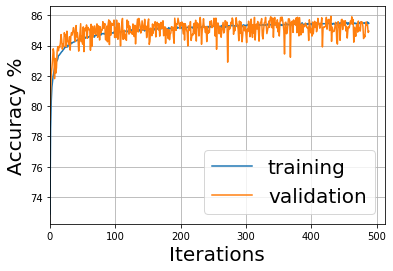

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

ann = history.history
plt.grid()
plt.plot(100 * np.array(ann['acc']), label='training')
plt.plot(100 * np.array(ann['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Accuracy %', fontsize=20)
plt.legend(loc='lower right', fontsize=20)

In [7]:
print ('Testing...')
yhat = model.predict(X_test, verbose = True, batch_size = 4096)
print(yhat)

Testing...
1221388/1221388 [==============================] - 4s 3us/step
[[1.9815151e-04 1.9030784e-01 7.0054424e-01 1.0739376e-01 1.5559840e-03]
 [6.6332982e-06 2.0334351e-01 8.1381691e-04 7.9411662e-01 1.7193781e-03]
 [9.9993241e-01 3.1786312e-05 2.3452088e-05 5.3435433e-06 6.9106218e-06]
 ...
 [7.8280456e-04 1.1524117e-01 8.7850237e-01 4.5188139e-03 9.5483736e-04]
 [5.0721096e-06 8.5240528e-03 3.8822014e-05 3.0537674e-01 6.8605530e-01]
 [1.7975416e-06 9.9529147e-01 6.7776789e-05 4.3263366e-03 3.1267930e-04]]


Normalized confusion matrix
[[0.96 0.02 0.01 0.   0.  ]
 [0.01 0.82 0.07 0.07 0.02]
 [0.01 0.03 0.95 0.01 0.  ]
 [0.01 0.17 0.05 0.7  0.07]
 [0.   0.05 0.01 0.11 0.83]]


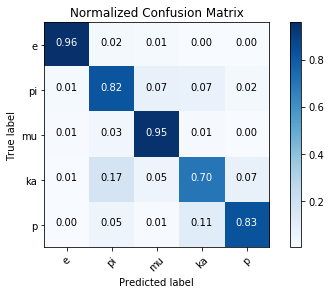

In [8]:
# CONFUSION MATRIX 5 classes (5 different particles)
yhat_cls = np.argmax(yhat, axis=1)
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_cls)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['e','pi','mu','ka','p'],
                      normalize=True,
                      title='Normalized Confusion Matrix')

In [9]:

#for particle in particle_list:
electrons = loadtestingdata('electrons')
pions = loadtestingdata('pions')
muons = loadtestingdata('muons')
kaons = loadtestingdata('kaons')
protons = loadtestingdata('protons')

df = createdataframe(electrons,pions,muons,kaons,protons,branch_names)

(206612, 37)
(201805, 37)
(211217, 37)
(198554, 37)
(194749, 37)


In [10]:
X_test, y_test = df.iloc[:,0:-1], df.iloc[:,-1]

#X_test = scaler.transform(X_test)
#X_test = pca.transform(X_test)
print ('Testing...')
yhat = model.predict(X_test, verbose = True, batch_size = 4096)
print(yhat)

Testing...
1012937/1012937 [==============================] - 3s 3us/step
[[1.00e+00 2.80e-06 4.08e-06 1.01e-06 3.01e-06]
 [1.00e+00 3.24e-05 2.61e-05 5.99e-06 5.06e-06]
 [1.00e+00 8.33e-05 4.54e-05 1.05e-05 8.28e-06]
 ...
 [1.64e-03 2.47e-01 4.13e-03 2.19e-01 5.28e-01]
 [4.86e-03 4.77e-02 1.57e-02 8.35e-02 8.48e-01]
 [1.97e-02 2.81e-01 4.72e-01 1.57e-01 6.98e-02]]


Test loss:0.37
Test accuracy:0.86
Normalized confusion matrix
[[0.96 0.02 0.01 0.   0.01]
 [0.01 0.8  0.11 0.05 0.03]
 [0.01 0.06 0.91 0.01 0.  ]
 [0.01 0.12 0.04 0.77 0.07]
 [0.01 0.06 0.02 0.08 0.84]]


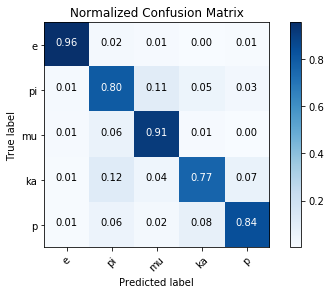

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:%.2f' %score[0])
print('Test accuracy:%.2f' % score[1])


# CONFUSION MATRIX 5 classes (5 different particles)
yhat_cls = np.argmax(yhat, axis=1)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_cls)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['e','pi','mu','ka','p'],
                      normalize=True,
                      title='Normalized Confusion Matrix')

In [12]:
model.save('/home/lewis/particles/model_5.hdf5')

In [13]:
# here we will find the accuracy of the model for certain momentum ranges

step_size = 0.04
upper_limit = 6.0
mom_range = np.arange(0.0,upper_limit+step_size,step_size)
scores = []

for momentum in mom_range:
    pmask = (df['Momentum'] <= (momentum+step_size)) & (df['Momentum'] > momentum)
    score = model.evaluate(X_test[pmask], y_test[pmask], verbose=0)
    scores.append(score[1])

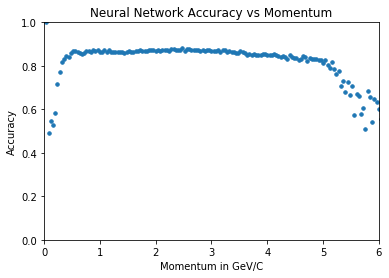

In [14]:
momentum_x = mom_range + step_size
# Create a scatter plot of the model's accuracy
plt.scatter(momentum_x, scores,s=12)
plt.title('Neural Network Accuracy vs Momentum')
plt.ylim(0,1)
plt.xlim(0,upper_limit)
plt.xlabel('Momentum in GeV/C')
plt.ylabel('Accuracy')
plt.show()